# Preprocesado de datos y entrenamiento del modelo

En este notebook se termina de preparar el dataset mediante la imputación de valores faltantes.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
countries = ['Germany','France','Netherlands','Italy','Poland']

In [29]:
for country in countries:
    if country not in ('luxembourg'):
        df = pd.read_csv(f'./Countries_citricos_completos/{country.capitalize()}.csv')
    
        ca = pd.concat([df[['Año']], df[df.columns[10:]]], axis=1)
        ca = ca.groupby('Año').mean().reset_index()

        # Extrapolación de los datos demográficos para 2024
        for col in ca.columns[1:]:  
            x1, x2 = ca['Año'].iloc[-3:-1]  
            y1, y2 = ca[col].iloc[-3:-1]    
            pendiente = (y2 - y1) / (x2 - x1)  
            ca.loc[ca['Año'] == 2024, col] = y2 + pendiente * (2024 - x2)

        valores_a_rellenar = ca.loc[ca['Año'] == 2024, ca.columns[1:]].values.flatten()
        df.loc[df['Año'] == 2024, df.columns[10:]] = [valores_a_rellenar] * len(df[df['Año'] == 2024])

        # Imputación de nulos en las temperaturas y precipitaciones
        df['Date'] = pd.to_datetime(df['Date'])
        df['Mes'] = df['Date'].dt.month
        df['Semana'] = df['Date'].dt.isocalendar().week
        media_octubre = df.loc[(df['Año'] == 2024) & (df['Mes'] == 10), ['Precipitación', 'Temperatura']].mean()
        df.loc[(df['Año'] == 2024) & (df['Mes'] == 11), ['Precipitación', 'Temperatura']] = df.loc[(df['Año'] == 2024) & (df['Mes'] == 11)].apply(
        lambda row: media_octubre + [10, -0.8], axis=1
        )

        # Reordenamos las columnas
        df = df[['Date','Semana','Mes','Año','Member State','Partner','Product','Euro Value',
                 'Unit Value', 'kg','Precipitación', 'Temperatura',
                 'Fem. Niños (5-14 años)', 'Fem. Adolescentes (15-19 años)',
                 'Fem. Adultos jóvenes (20-34 años)', 'Fem. Adultos medios (35-54 años)',
                 'Fem. Adultos mayores (55-74 años)', 'Fem. Ancianos (75+ años)',
                 'Masc. Niños (5-14 años)', 'Masc. Adolescentes (15-19 años)',
                 'Masc. Adultos jóvenes (20-34 años)',
                 'Masc. Adultos medios (35-54 años)',
                 'Masc. Adultos mayores (55-74 años)', 'Masc. Ancianos (75+ años)',
                 'PIB per capita']]

        df.to_csv(f'./Countries_citricos_completos/{country.capitalize()}.csv', index=False)

## Preprocesado de Polonia
Dado que Polonia se ve muy afectada por el COVID-19, vamos a tratar de mitigar el efecto que tiene esto en los modelos. Así pues, supondremos que los valores de 2020 son similares a los de 2019, práctica muy habitual para tratar este suceso. 

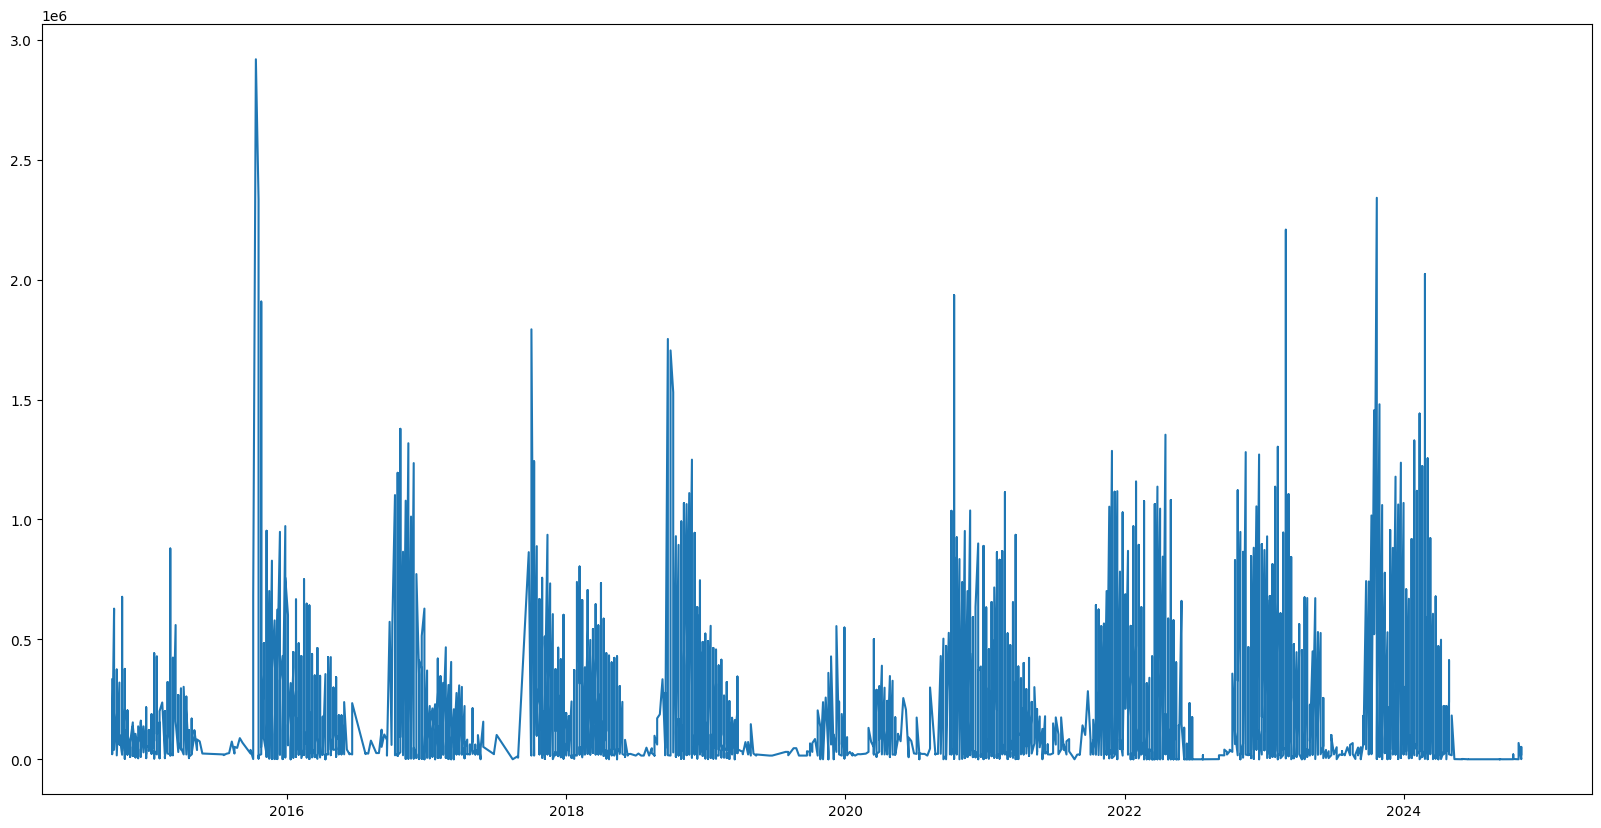

In [63]:
df = pd.read_csv(f'./Countries_citricos_completos/Poland.csv')
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(20,10))
plt.plot(df['Date'], df['kg'])
plt.show()

Se puede ver que ya el otoño del año 2019 no fue normal en Polonia con muchas menos importaciones de lo habitual. A partir del otoño de 2020 la situación vuelve a la normalidad. Vamos a hacer los datos del otoño de 2019 y el invierno y primavera de 2020 algo más normales. 

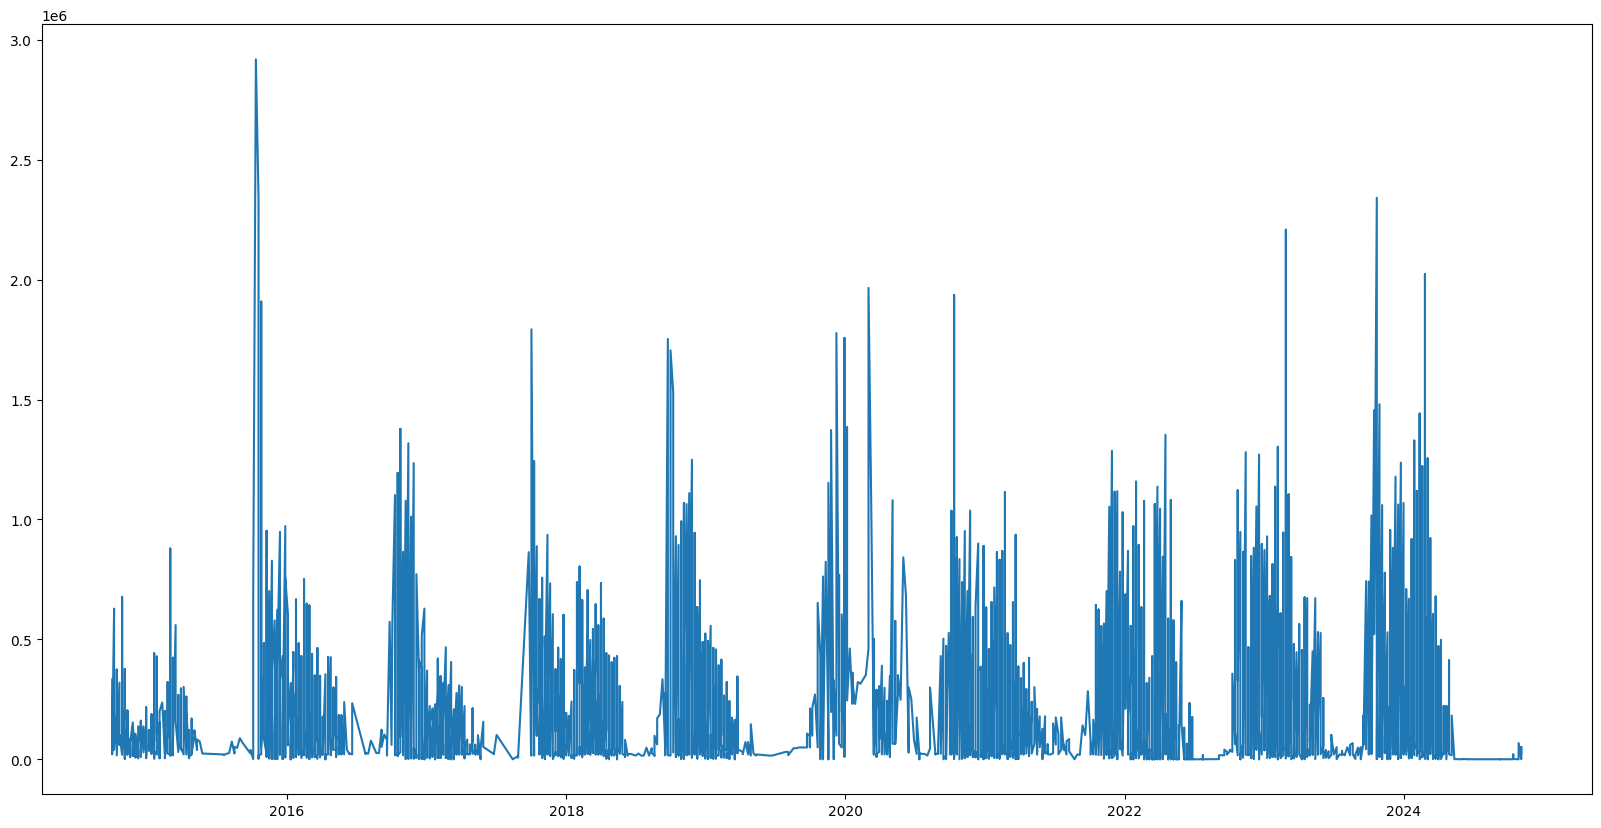

In [64]:
mask1 = df['Date'].between('2019-09-01','2019-12-31')
mask2 = df['Date'].between('2020-01-01','2020-03-15')
mask3 = df['Date'].between('2020-05-01','2020-07-01')

df.loc[mask1, 'kg'] = df.loc[mask1, 'kg'] * 3.2
df.loc[mask2, 'kg'] = df.loc[mask2, 'kg'] * 15
df.loc[mask3, 'kg'] = df.loc[mask3, 'kg'] * 3.3

plt.figure(figsize=(20,10))
plt.plot(df['Date'], df['kg'])
plt.show()

In [65]:
df.to_csv(f'./Countries_citricos_completos/Poland.csv', index=False)